In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
xx = np.array([-0.51, 51.2])
yy = np.array([0.33, 51.6])
means = [xx.mean(), yy.mean()]
stds = [xx.std() / 3, yy.std() / 3]
corr = 0.8         # correlation
covs = [[stds[0]**2          , stds[0]*stds[1]*corr],
        [stds[0]*stds[1]*corr,           stds[1]**2]]

m = np.random.multivariate_normal(means, covs, 1000).T

In [4]:
df = pd.DataFrame()
df['exp(in months)'] = m[0]
df['salary(in thousands)'] = m[1]
df.head()

,exp(in months),salary(in thousands)
0,22.036516,29.827932
1,16.846948,23.187110
2,24.034924,21.035680
3,20.985694,17.699862
4,22.235346,17.542454


### Display data in Scatter Plot

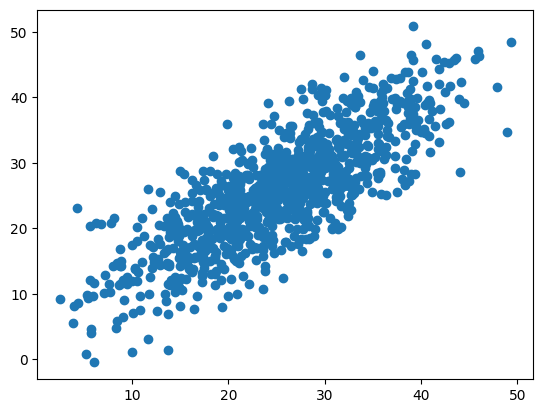

In [5]:
# Display data in Scatter Plot
plt.scatter(df['exp(in months)'], df['salary(in thousands)'])

In [6]:
X = df.drop(columns=['salary(in thousands)'])
y = df['salary(in thousands)']

### Split the data

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=7895)

In [8]:
y_test.isna().any()

np.False_

### Apply the Linearregression model

In [9]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

In [10]:
y_pred = model.predict(X_test)

In [11]:
# X coefficient
print(model.coef_[0])

# Y intercept
print(model.intercept_)

0.8049469679498192
5.464874930247227


In [12]:
df_error = pd.DataFrame()
df_error['y_predict'] = y_pred
df_error['y_test'] = y_test.values
df_error.shape

(200, 2)

### Perform Regression metrics

In [13]:
# MEAN ABSOLUTE ERROR

from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

4.040953052499322

In [14]:
# MEAN SQUARED ERROR

from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

27.062402867280944

In [15]:
# ROOT MEAN SQUARED ERROR

from sklearn.metrics import root_mean_squared_error
root_mean_squared_error(y_test, y_pred)

5.2021536758616564

In [17]:
# R2 SCORE

from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.6485136629106547

### Plot the Linear Regression Line

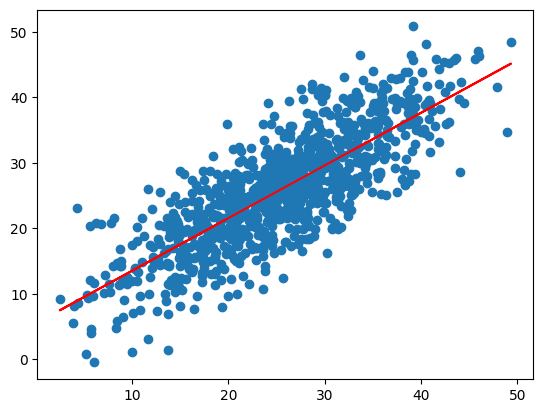

In [19]:
plt.plot(X_train, model.predict(X_train), color='red')
plt.scatter(df['exp(in months)'], df['salary(in thousands)'])